In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
from src.results.statistical_analysis import perform_paired_tests, calculate_grouped_statistics, compare_variability_between_metrics, compare_means_between_metrics
from src.visualization.plots import plot_complexity_differences
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_complexity = pd.read_parquet('data/results/complexity_data.parquet')
df_differences = pd.read_parquet('data/results/differences_data.parquet')

In [4]:
df_differences = round(df_differences, 4)

In [5]:
df_differences

,dataset,k,metric,dataset_complexity_global,dataset_complexity_mean_folds,majority_class_complexity_global,majority_class_complexity_mean_folds,minority_class_complexity_global,minority_class_complexity_mean_folds,dataset_complexity_difference,majority_class_complexity_difference,minority_class_complexity_difference,most_complex_class_global,least_complex_class_global,most_complex_class_mean_folds,least_complex_class_mean_folds,most_complex_class_difference,least_complex_class_difference
0,a9a,1,ddn,0.2124,0.2134,0.1454,0.1462,0.4236,0.4252,-0.0010,-0.0008,-0.0016,0.4236,0.1454,0.4252,0.1462,-0.0016,-0.0008
1,a9a,1,kdn,0.1888,0.1908,0.1295,0.1307,0.3757,0.3802,-0.0020,-0.0013,-0.0045,0.3757,0.1295,0.3802,0.1307,-0.0045,-0.0013
2,a9a,2,ddn,0.2144,0.2150,0.1468,0.1473,0.4277,0.4287,-0.0006,-0.0005,-0.0011,0.4277,0.1468,0.4287,0.1473,-0.0011,-0.0005
3,a9a,2,kdn,0.2002,0.2010,0.1387,0.1387,0.3941,0.3973,-0.0008,-0.0001,-0.0033,0.3941,0.1387,0.3973,0.1387,-0.0033,-0.0001
4,a9a,3,ddn,0.2165,0.2174,0.1486,0.1495,0.4306,0.4317,-0.0009,-0.0008,-0.0011,0.4306,0.1486,0.4317,0.1495,-0.0011,-0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,yeast6,8,kdn,0.0299,0.0303,0.0170,0.0172,0.5643,0.5705,-0.0004,-0.0002,-0.0062,0.5643,0.0170,0.5705,0.0172,-0.0062,-0.0002
1370,yeast6,9,ddn,0.0320,0.0322,0.0163,0.0157,0.6820,0.7131,-0.0002,0.0005,-0.0311,0.6820,0.0163,0.7131,0.0157,-0.0311,0.0005
1371,yeast6,9,kdn,0.0297,0.0306,0.0170,0.0172,0.5556,0.5849,-0.0009,-0.0002,-0.0294,0.5556,0.0170,0.5849,0.0172,-0.0294,-0.0002
1372,yeast6,10,ddn,0.0327,0.0326,0.0161,0.0156,0.7171,0.7386,0.0000,0.0006,-0.0215,0.7171,0.0161,0.7386,0.0156,-0.0215,0.0006


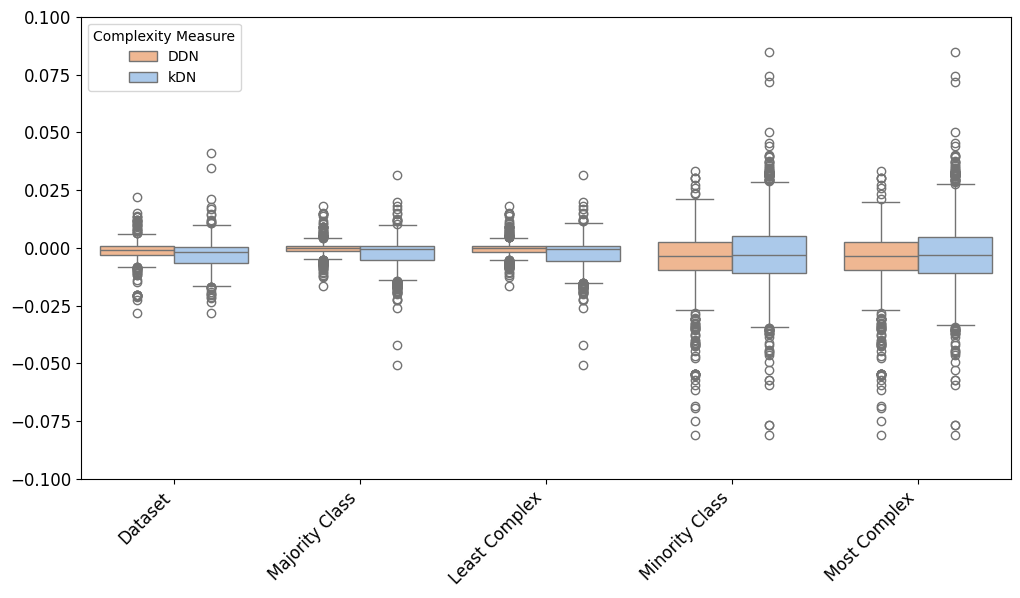

In [9]:
plot_complexity_differences(df_differences)

In [8]:
perform_paired_tests(df_differences)


Results for measure: ddn
Comparison: dataset_complexity_global vs dataset_complexity_mean_folds - Wilcoxon signed-rank test (Outliers included):
t-statistic: 65059.000, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: majority_class_complexity_global vs majority_class_complexity_mean_folds - Wilcoxon signed-rank test (Outliers included):
t-statistic: 92359.500, p-value: 0.001
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: minority_class_complexity_global vs minority_class_complexity_mean_folds - Wilcoxon signed-rank test (Outliers included):
t-statistic: 69592.000, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: most_complex_class_global vs most_com

In [9]:
outliers = perform_paired_tests(df_differences, remove_outliers=True, return_outliers=True)


Results for measure: ddn
Comparison: dataset_complexity_global vs dataset_complexity_mean_folds - Wilcoxon signed-rank test (Outliers removed):
t-statistic: 65059.000, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: majority_class_complexity_global vs majority_class_complexity_mean_folds - Wilcoxon signed-rank test (Outliers removed):
t-statistic: 64326.500, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: minority_class_complexity_global vs minority_class_complexity_mean_folds - Wilcoxon signed-rank test (Outliers removed):
t-statistic: 69592.000, p-value: 0.000
The difference is highly significant at the 99% confidence level (p < 0.01). There is strong evidence that the two measures are different.

Comparison: most_complex_class_global vs most_comple

In [10]:
outliers

,dataset,k,metric,dataset_complexity_global,dataset_complexity_mean_folds,majority_class_complexity_global,majority_class_complexity_mean_folds,minority_class_complexity_global,minority_class_complexity_mean_folds,dataset_complexity_difference,majority_class_complexity_difference,minority_class_complexity_difference,most_complex_class_global,least_complex_class_global,most_complex_class_mean_folds,least_complex_class_mean_folds,most_complex_class_difference,least_complex_class_difference
166,bupa,8,ddn,0.4734,0.4763,0.4915,0.4950,0.4544,0.4569,-0.0029,-0.0035,-0.0024,0.4915,0.4544,0.4950,0.4569,-0.0035,-0.0024
168,bupa,9,ddn,0.4767,0.4771,0.4968,0.4964,0.4557,0.4570,-0.0004,0.0004,-0.0013,0.4968,0.4557,0.4964,0.4570,0.0004,-0.0013
170,bupa,10,ddn,0.4784,0.4786,0.4990,0.4991,0.4570,0.4573,-0.0002,-0.0001,-0.0003,0.4990,0.4570,0.4991,0.4573,-0.0001,-0.0003
172,bupa,11,ddn,0.4801,0.4795,0.5009,0.5005,0.4586,0.4577,0.0006,0.0004,0.0009,0.5009,0.4586,0.5005,0.4577,0.0004,0.0009
912,splice,2,ddn,0.3324,0.3373,0.4993,0.5006,0.1536,0.1625,-0.0049,-0.0013,-0.0089,0.4993,0.1536,0.5006,0.1625,-0.0013,-0.0089
914,splice,3,ddn,0.3533,0.3582,0.5195,0.5206,0.1755,0.1843,-0.0048,-0.0011,-0.0088,0.5195,0.1755,0.5206,0.1843,-0.0011,-0.0088
916,splice,4,ddn,0.3682,0.3723,0.5293,0.5299,0.1958,0.2035,-0.0041,-0.0006,-0.0078,0.5293,0.1958,0.5299,0.2035,-0.0006,-0.0078
918,splice,5,ddn,0.3786,0.3823,0.5363,0.5363,0.2097,0.2174,-0.0037,-0.0000,-0.0077,0.5363,0.2097,0.5363,0.2174,-0.0000,-0.0077
920,splice,6,ddn,0.3868,0.3891,0.5397,0.5391,0.2230,0.2284,-0.0023,0.0006,-0.0054,0.5397,0.2230,0.5391,0.2284,0.0006,-0.0054
922,splice,7,ddn,0.3917,0.3950,0.5415,0.5416,0.2314,0.2380,-0.0032,-0.0001,-0.0066,0.5415,0.2314,0.5416,0.2380,-0.0001,-0.0066


## Differences between kdn and ddn

In [11]:
for diff in [
        'dataset_complexity_difference',
        'majority_class_complexity_difference',
        'minority_class_complexity_difference',
        'most_complex_class_difference',
        'least_complex_class_difference'
    ]:
    print(diff)
    display(calculate_grouped_statistics(df_differences, diff=diff, x_var='metric'))
               

dataset_complexity_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0009,-0.001344,0.004496,-0.0283,0.0218,687
1,kdn,-0.0019,-0.003264,0.006883,-0.0283,0.0412,687


majority_class_complexity_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0000,-0.000328,0.003386,-0.0165,0.0181,687
1,kdn,-0.0006,-0.002902,0.007343,-0.0507,0.0317,687


minority_class_complexity_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0036,-0.005482,0.014887,-0.0812,0.0334,687
1,kdn,-0.0031,-0.001353,0.027251,-0.0812,0.3636,687


most_complex_class_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0034,-0.005467,0.014857,-0.0812,0.0334,687
1,kdn,-0.0031,-0.001369,0.027215,-0.0812,0.3636,687


least_complex_class_difference


,metric,median,mean,std,min,max,count
0,ddn,-0.0000,-0.000342,0.003473,-0.0165,0.0181,687
1,kdn,-0.0006,-0.002886,0.007417,-0.0507,0.0317,687


In [12]:
compare_variability_between_metrics(df_differences)

Comparison: dataset_complexity_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 84.037, p-value: 0.000
The difference in variance is highly significant at the 99% confidence level (p < 0.01).

Comparison: majority_class_complexity_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 128.700, p-value: 0.000
The difference in variance is highly significant at the 99% confidence level (p < 0.01).

Comparison: minority_class_complexity_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 18.348, p-value: 0.000
The difference in variance is highly significant at the 99% confidence level (p < 0.01).

Comparison: most_complex_class_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 17.754, p-value: 0.000
The difference in variance is highly significant at the 99% confidence level (p < 0.01).

Comparison: least_complex_class_difference - Levene's test between 'kdn' and 'ddn':
Statistic: 126.093, p-value: 0.000
The difference in variance is highly s

In [13]:
compare_means_between_metrics(df_differences)

Comparison: dataset_complexity_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 195971.500, p-value: 0.000
The difference in means is highly significant at the 99% confidence level (p < 0.01).

Comparison: majority_class_complexity_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 196627.500, p-value: 0.000
The difference in means is highly significant at the 99% confidence level (p < 0.01).

Comparison: minority_class_complexity_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 247381.000, p-value: 0.121
The difference in means is not statistically significant.

Comparison: most_complex_class_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 246944.000, p-value: 0.136
The difference in means is not statistically significant.

Comparison: least_complex_class_difference - Mann-Whitney U test between 'kdn' and 'ddn':
Statistic: 198292.500, p-value: 0.000
The difference in means is highly significant at the 99% c